## <center> Аттестация. Практическое задание в Jupyter
    
#### 106_group_dst_92


Кузьмин Олег

В данном блоке вам предстоит решить задачу, которую автор когда-то решал на одном из своих собеседований.
Вам предоставлена таблица с данными (скачать файл можно на платформе) о ежедневной выработке энергии солнечными батареями. Информация в ней содержится в двух столбцах: 
* date - дата наблюдения
* cum_power - накопленная (кумулятивная) выработка энергии на указанный день

То есть перед вами классический пример временного ряда: числовой показатель, зависящий от времени. Давайте с ним поработаем.


In [1]:
import pandas as pd
import numpy as np

1. В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями: </p>
    $$x^*_i  = \frac{x_{i-1} + x_{i+1}}{2}$$ 
    
Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.


In [2]:
df = pd.read_csv('solarpower.csv')

In [7]:
for i in range(df.shape[0]):
        if df.iloc[i, 1] == -1.0:
            df.iloc[i, 1] = (df.iloc[i-1, 1] + df.iloc[i+1, 1])/2

2. Теперь, когда таблица заполнена, создайте столбец day_power - ежедневный прирост выработки солнечной энергии.

    После чего создайте данные о ежемесячной выработке энергии на каждый год. 
    
Совет: для того, чтобы выделить из даты год и месяц проще всего воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды, в данном случае 'М' - месяц.

In [18]:
df['date'] = pd.to_datetime(df['date'])
df['day_power'] = df['cum_power'].diff()

In [58]:
df1=df.groupby(df['date'].dt.to_period('M'))['day_power'].sum()
df1 = df1.reset_index()

3. Постройте график временного ряда - ежемесячной выработки солнечной энергии. Не забудьте подписать оси и сам график.
Укажите в какие сезоны наблюдается подъем, а в какие спад?

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

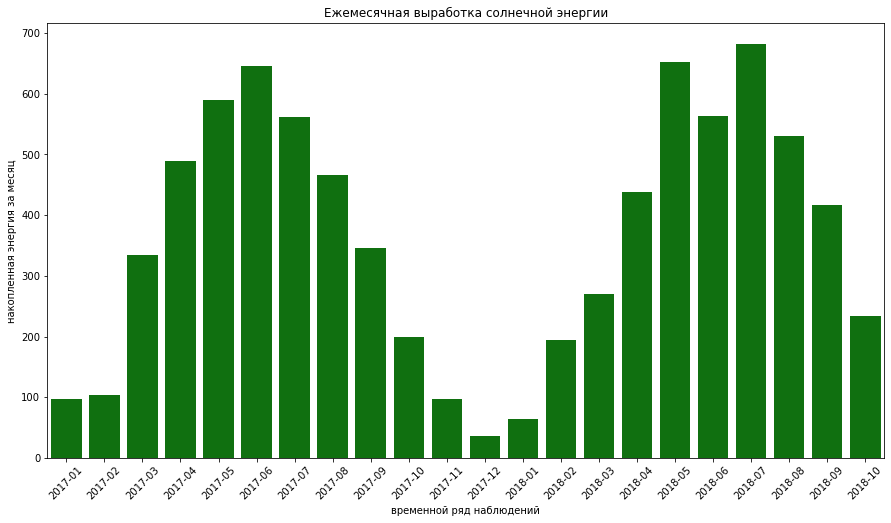

In [57]:
fig = plt.figure(figsize=(15, 8))
plt.xticks(rotation = 45)
sns.barplot(data=df1, x='date', y='day_power', color='green')
plt.title('Ежемесячная выработка солнечной энергии')
plt.xlabel('временной ряд наблюдений') 
plt.ylabel('накопленная энергия за месяц')
plt.show()

Очевидна зависимость от времени года, летом много солнечных дней, и дни продолжительнее, в этот период наккаливается много энергии. Зимой обратная картина и нехватка солнца отражается не только на людях, но и на энергии солнечных батарей.